# Import librarys and data


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import pickle
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from random import randrange, uniform

import shutil
import itertools
from time import time

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 

sns.set()

output_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 
                 'A','B','C','D','E','F','G','H','I','J','K','L','M',
                 'N', 'O','P','Q','R','S', 'T','U','V','W','X','Y','Z']

In [2]:
# Kaggle A-Z dataset
kaggle_az = pd.read_csv("dataset/a_z.csv", header=None)

In [3]:
# MNIST DATASET
mnist = pd.read_csv("dataset/mnist.csv", header=None)

# Explore

In [4]:
kaggle_az

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372446,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372447,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372448,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372449,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
mnist

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Concate the two dataframes

- New labels : 
    - 0-9 : 0-9.
    - A-Z : 10-35. Means we will add 10 to all values of the first column (labels)


In [6]:
kaggle_az[0] = kaggle_az[0] + 10

In [7]:
kaggle_az

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372446,35,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372447,35,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372448,35,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372449,35,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Combine the two dataframes:

X_kaggle = kaggle_az.drop(0,axis = 1)
y_kaggle = kaggle_az[0]

X_mnist = mnist.drop(0,axis = 1)
y_mnist = mnist[0]

In [9]:
X = np.concatenate((X_kaggle, X_mnist))
y = np.concatenate((y_kaggle, y_mnist))

In [10]:
# Shuffle the data, we do not shuffle X and y sepratly otherwise we will lose the true labels
data = []
data.append([X, y])
random.shuffle(data)

In [11]:
# Retreive X and y from data :
X = []
y = []

for features,label in data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, 28, 28, 1)
X = X.astype(int)
y = np.array(y)
y = y.reshape((y.shape[1], 1)) # we do not want (1, n)

In [12]:
print(X.shape, y.shape)

(452451, 28, 28, 1) (452451, 1)


In [13]:
# Save data in pickle format
pickle_out = open("dataset_pickle/X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("dataset_pickle/y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [14]:
# Load the data
pickle_in = open("dataset_pickle/X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("dataset_pickle/y.pickle","rb")
y = pickle.load(pickle_in)

- Let's plot random sample from the entire dataset:

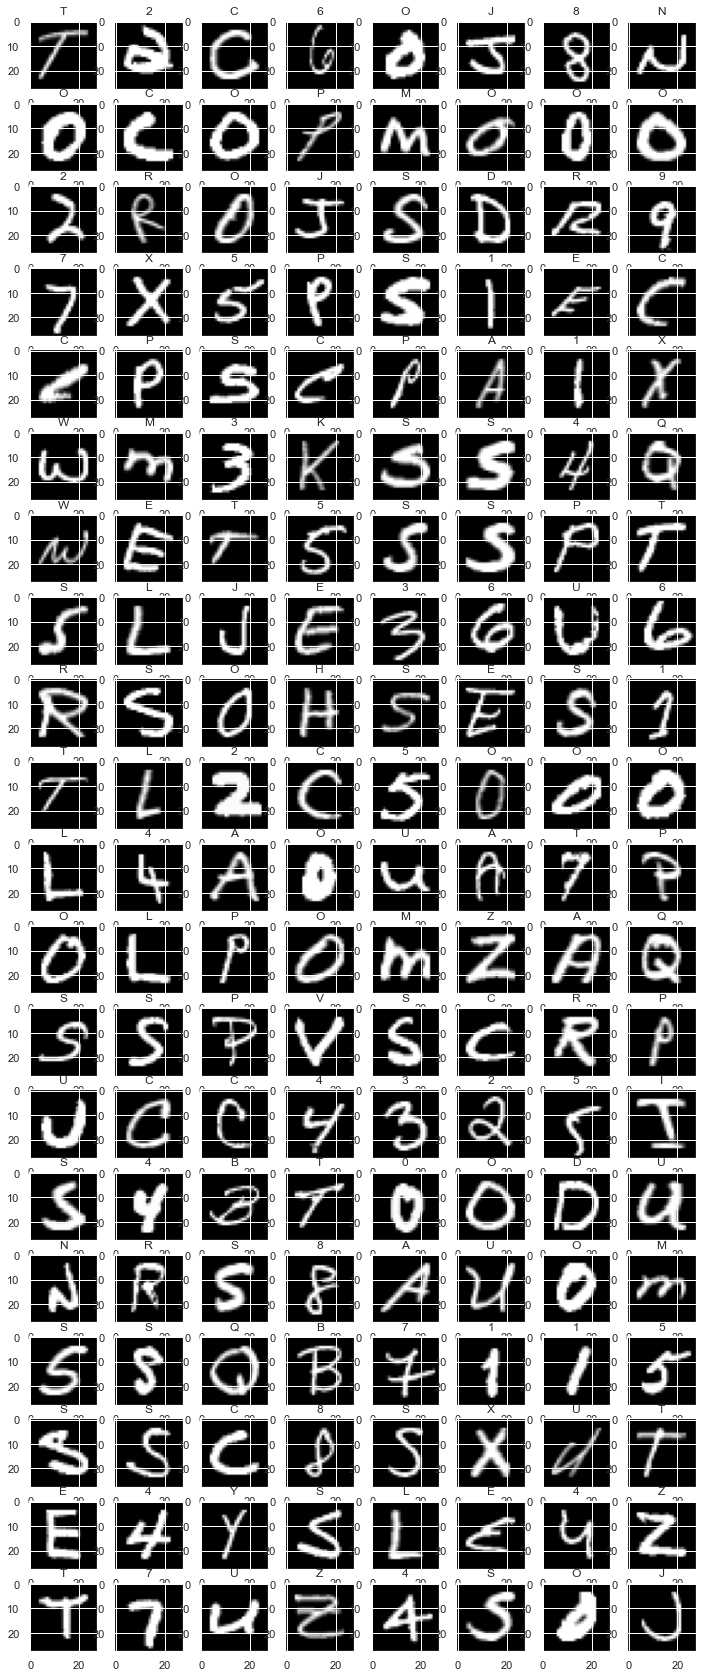

In [15]:
w = 10
h = 10
fig = plt.figure(figsize=(12, 30))
columns = 8
rows = 20
for i in range(1, columns*rows +1):
    random_index = random.randrange(0, len(X))
    img = X[random_index]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
    plt.title(output_labels[int(y[random_index])])
plt.show()

# Data preparation

In [16]:
# splite the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

# Normalize the data
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [17]:
# One hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build the model


In [41]:
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
#model.add(MaxPooling2D(pool_size=(12, 12)))
model.add(Dropout(0.5))
model.add(Flatten())
#model.add(Dense(125, activation='relu'))
model.add(Dense(len(output_labels), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
model.fit(X_train, y_train, validation_split=0.35, epochs=3, batch_size=15)

Epoch 1/3
14705/14705 [==============================] - 148s 10ms/step - loss: 0.2810 - accuracy: 0.9227 - val_loss: 0.1603 - val_accuracy: 0.9577
Epoch 2/3
14705/14705 [==============================] - 158s 11ms/step - loss: 0.1631 - accuracy: 0.9545 - val_loss: 0.1336 - val_accuracy: 0.9650
Epoch 3/3
14705/14705 [==============================] - 163s 11ms/step - loss: 0.1363 - accuracy: 0.9617 - val_loss: 0.1272 - val_accuracy: 0.9658


In [43]:
scores = model.evaluate(X_test, y_test)

3535/3535 [==============================] - 9s 3ms/step - loss: 0.1313 - accuracy: 0.9642


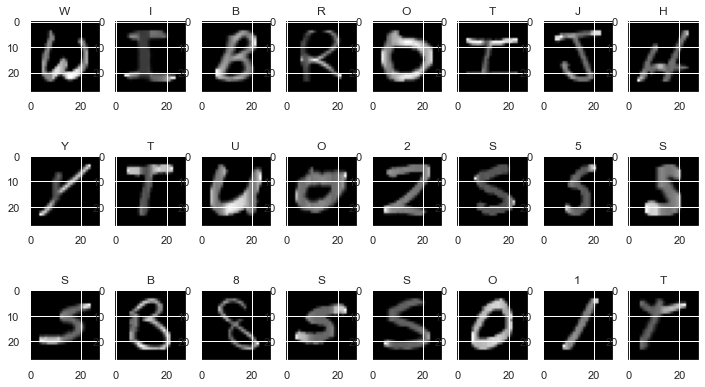

In [44]:
w = 10
h = 10
fig = plt.figure(figsize=(12, 7))
columns = 8
rows = 3
for i in range(1, columns*rows +1):
    random_index = random.randrange(0, len(X_test))
    img = X_test[random_index]
    image = np.expand_dims(img, axis=0)
    pred = np.argmax(model.predict(image)[0])
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
    plt.title(output_labels[pred])
plt.show()

In [45]:
model.save("model_h5_format/model.h5")

In [2]:
model = load_model("model_h5_format/model.h5")

## Prediction on painted images

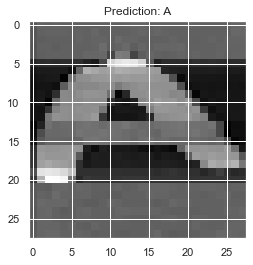

In [6]:
image = cv2.imread('img/handwritting/20.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.resize(image, (28, 28))
image = cv2.bitwise_not(image)  # Make images in binary format
image_norm = tf.keras.utils.normalize(image, axis=1)
image_expanded = np.expand_dims(image_norm, axis=0)
prediction = model.predict(image_expanded)
index = np.argmax(prediction[0])
plt.imshow(image_norm, cmap='gray')
plt.title(f"Prediction: {output_labels[index]}")
plt.show()

# Next step

  - This model works only on single characters. In the second notebook, we will preprocess images so the model can predict every character in an given image.
  
[Notebook 2](2%20-%20Text%20recognition.ipynb)